In [255]:
class PID:
    def __init__(self, Kp, Ki, Kd):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.last_error = 0
        self.integral = 0
    
    def compute(self,setpoint, process, dt):
        error = setpoint - process
        proportional = error
        self.integral += error *dt
        derivative = (error - self.last_error) / dt
        
        output = self.Kp * proportional + self.Ki * self.integral + self.Kd * derivative
        
        # Update stored values for next iteration
        self.last_error = error
        
        return output
    
import numpy as np
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, kp, ki, kd, delta_t):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.dt = delta_t
        self.last_error = 0
        self.integral_error = 0

    def calculate(self, error):
        self.integral_error += error * self.dt
        derivative_error = (error - self.last_error) / self.dt
        output = self.kp * error + self.ki * self.integral_error + self.kd * derivative_error
        self.last_error = error
        return output


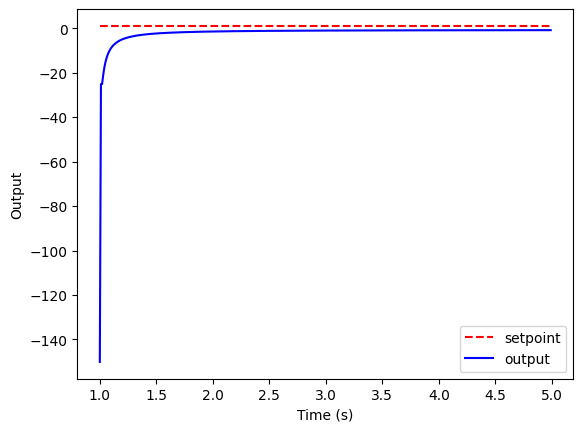

In [321]:
import matplotlib.pyplot as plt
import numpy as np

def system(x):
    return 1 / (1+x)


pid = PID(100, 10, 0.5)
dt = 0.01
t = np.arange(1, 5, dt)

output = []

y_init = system(0)
r = 1
setpoint = [r]*len(t)

for i in range(len(t)):
    process = system(i) + y_init
    u = pid.compute(setpoint[i], process, dt)
    y = system(u)
    output.append(u)


plt.plot(t, setpoint, 'r--', label='setpoint')
plt.plot(t, output, 'b-', label='output')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.show()